In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new, ignore_index = True)

In [3]:
np.sort(df.request_method.unique())


array(['"GET / HTTP/1.1"', '"GET /api/V1/HiZach! HTTP/1.1"',
       '"GET /api/v1 HTTP/1.1"', '"GET /api/v1/ HTTP/1.1"',
       '"GET /api/v1//api/v1/items HTTP/1.1"',
       '"GET /api/v1//api/v1/items/next_page HTTP/1.1"',
       '"GET /api/v1//api/v1/items?page=2 HTTP/1.1"',
       '"GET /api/v1/I_DIDNT_DO_IT!!!! HTTP/1.1"',
       '"GET /api/v1/helloclass! HTTP/1.1"',
       '"GET /api/v1/items HTTP/1.1"',
       '"GET /api/v1/items&page=0 HTTP/1.1"',
       '"GET /api/v1/items/api/v1/items?page=2 HTTP/1.1"',
       '"GET /api/v1/items/api/v1/items?page=3 HTTP/1.1"',
       '"GET /api/v1/items/next_page HTTP/1.1"',
       '"GET /api/v1/items?page=0 HTTP/1.1"',
       '"GET /api/v1/items?page=1 HTTP/1.1"',
       '"GET /api/v1/items?page=2 HTTP/1.1"',
       '"GET /api/v1/items?page=3 HTTP/1.1"',
       '"GET /api/v1/items?page=4 HTTP/1.1"',
       '"GET /api/v1/items?page=99999999999999999998 HTTP/1.1"',
       '"GET /api/v1/itemsitems HTTP/1.1"',
       '"GET /api/v1/sales HTTP/1.

In [4]:
df.head(1)

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""


In [5]:
df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')
df

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:44+00:00,97.105.19.58,"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:46+00:00,97.105.19.58,"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:48+00:00,97.105.19.58,"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:48+00:00,97.105.19.58,"""GET /api/v1/stores HTTP/1.1""",200,1328,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:50+00:00,97.105.19.58,"""GET /api/v1/sales?page=85 HTTP/1.1""",200,510753,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:52+00:00,97.105.19.58,"""GET /api/v1/sales?page=86 HTTP/1.1""",200,510348,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:52+00:00,97.105.19.58,"""GET / HTTP/1.1""",200,42,NaN,"""python-requests/2.21.0"""


In [6]:
for col in ['request_method', 'request_agent', 'destination']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

df.head()


,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,13978.0,200.356703,10.182001,200.0,200.0,200.0,200.0,499.0
size,13978.0,450001.905781,161491.467157,0.0,500637.0,510138.0,511291.0,2056327.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

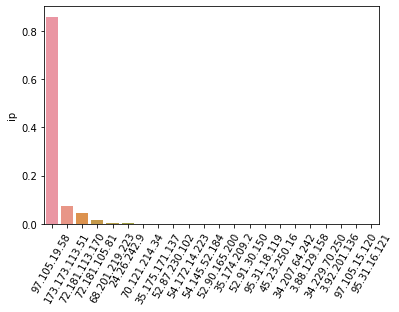

In [8]:
sns.barplot(y = df.ip.value_counts()/df.shape[0], x = (df.ip.value_counts()/df.shape[0]).index)
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

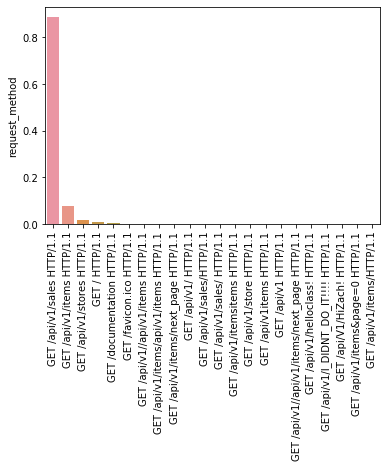

In [9]:
sns.barplot(y = df.request_method.value_counts()/df.shape[0], x = (df.request_method.value_counts()/df.shape[0]).index)
plt.xticks(rotation = 90)

In [13]:
(df.request_method.value_counts()/df.shape[0])

GET /api/v1/sales HTTP/1.1                      0.887323
GET /api/v1/items HTTP/1.1                      0.076191
GET /api/v1/stores HTTP/1.1                     0.016383
GET / HTTP/1.1                                  0.007655
GET /documentation HTTP/1.1                     0.007154
GET /favicon.ico HTTP/1.1                       0.001860
GET /api/v1//api/v1/items HTTP/1.1              0.000787
GET /api/v1/items/api/v1/items HTTP/1.1         0.000501
GET /api/v1/items/next_page HTTP/1.1            0.000358
GET /api/v1/ HTTP/1.1                           0.000286
GET /api/v1/sales/HTTP/1.1                      0.000215
GET /api/v1/sales/ HTTP/1.1                     0.000215
GET /api/v1/itemsitems HTTP/1.1                 0.000215
GET /api/v1/store HTTP/1.1                      0.000215
GET /api/v1items HTTP/1.1                       0.000143
GET /api/v1 HTTP/1.1                            0.000072
GET /api/v1//api/v1/items/next_page HTTP/1.1    0.000072
GET /api/v1/helloclass! HTTP/1.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

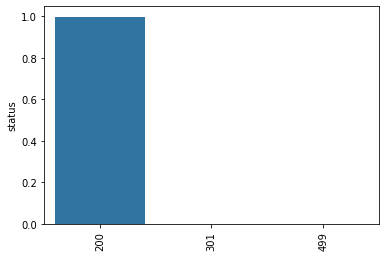

In [11]:
sns.barplot(y = df.status.value_counts()/df.shape[0], x = (df.status.value_counts()/df.shape[0]).index)
plt.xticks(rotation = 90)

In [12]:
df[df.status == 499]

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:55:15+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1
2019-04-16 19:56:02+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1
2019-04-16 20:28:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:33:24+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:38:13+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:38:55+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:39:00+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:45:17+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0
2019-04-16 20:45:28+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0


In [17]:
df.request_agent.str.strip().value_counts()

python-requests/2.21.0                                                                                                       12005
python-requests/2.20.1                                                                                                        1911
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36       34
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0                                               8
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)                                                                       7
Slackbot 1.0 (+https://api.slack.com/robots)                                                                                     6
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36        4
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gec

In [19]:
df.request_method = df.request_method.str.strip()
df.parts = df.request_method.str.split(' ')

In [21]:
df['http_method'] = df.parts.apply(lambda x: x[0])

In [23]:
df.http_method.value_counts()

GET    13978
Name: http_method, dtype: int64

In [24]:
df['endpoints'] = df.parts.apply(lambda x: x[1])
df.endpoints.value_counts()

/api/v1/sales                      12403
/api/v1/items                       1065
/api/v1/stores                       229
/                                    107
/documentation                       100
/favicon.ico                          26
/api/v1//api/v1/items                 11
/api/v1/items/api/v1/items             7
/api/v1/items/next_page                5
/api/v1/                               4
/api/v1/store                          3
/api/v1/itemsitems                     3
/api/v1/sales/HTTP/1.1                 3
/api/v1/sales/                         3
/api/v1items                           2
/api/v1/items&page=0                   1
/api/v1/items/HTTP/1.1                 1
/api/v1                                1
/api/V1/HiZach!                        1
/api/v1//api/v1/items/next_page        1
/api/v1/I_DIDNT_DO_IT!!!!              1
/api/v1/helloclass!                    1
Name: endpoints, dtype: int64

In [25]:
df.ip.value_counts()

97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
70.121.214.34         2
35.175.171.137        2
52.87.230.102         2
54.172.14.223         1
54.145.52.184         1
52.90.165.200         1
35.174.209.2          1
52.91.30.150          1
95.31.18.119          1
45.23.250.16          1
34.207.64.242         1
3.88.129.158          1
34.229.70.250         1
3.92.201.136          1
97.105.15.120         1
95.31.16.121          1
Name: ip, dtype: int64